In [1]:
!git clone https://github.com/BSCH-FDL-2024/Face-Mask-Dataset.git

Cloning into 'Face-Mask-Dataset'...
remote: Enumerating objects: 11633, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 11633 (delta 0), reused 1 (delta 0), pack-reused 11631
Receiving objects: 100% (11633/11633), 326.21 MiB | 69.68 MiB/s, done.
Checking out files: 100% (11792/11792), done.


In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt

import os
os.listdir()

['Face_Mask_VGG16_Transfer.ipynb',
 '04b_asl_predictions.ipynb',
 '05a_doggy_door.ipynb',
 'data',
 'Face-Mask-Dataset',
 '02_asl.ipynb',
 '.ipynb_checkpoints',
 '06_headline_generator.ipynb',
 '04a_asl_augmentation.ipynb',
 '03_asl_cnn.ipynb',
 '05b_presidential_doggy_door.ipynb',
 '01_mnist.ipynb',
 'images',
 '07_assessment.ipynb',
 '00_jupyterlab.ipynb']

In [4]:
# IMAGE_SIZE = [224, 224]
# training image size will be 224,224

In [3]:
train_path = 'Face-Mask-Dataset/Train'
valid_path = 'Face-Mask-Dataset/Validation'

In [4]:
folder = glob('Face-Mask-Dataset/Train/*')
print(folder)
print(len(folder))

['Face-Mask-Dataset/Train/WithMask', 'Face-Mask-Dataset/Train/WithoutMask']
2


In [5]:
base_model = keras.applications.VGG16(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(224, 224, 3),
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [6]:
base_model.trainable = False

In [66]:
inputs = keras.Input(shape=(224, 224, 3))

In [67]:
x = base_model(inputs, training=False)

In [68]:
x = keras.layers.GlobalAveragePooling2D()(x)  # x =  Flatten()(x)

In [69]:
outputs = keras.layers.Dense(1)(x)

In [70]:
model = keras.Model(inputs, outputs)  # model = Dense(len(folder), activation='softmax')(x)

In [71]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 14,715,201
Trainable params: 513
Non-trainable params: 14,714,688
_________________________________________________________________


In [9]:
# Sequential Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Flatten, Input

model = Sequential()
# model.add(Input(shape=(244,244,3)))
model.add(base_model)
model.add(GlobalAveragePooling2D()) # model.add(Flatten())
model.add(Dense(units=1, activation="sigmoid"))

# Model Compile

In [10]:
# Important to use binary crossentropy and binary accuracy as we now have a binary classification problem
# model.compile(loss=keras.losses.BinaryCrossentropy(from_logits=True), 
#               metrics=[keras.metrics.BinaryAccuracy()])

In [18]:
model.compile(loss=keras.losses.BinaryCrossentropy(), 
              metrics=[keras.metrics.BinaryAccuracy()])

In [72]:
# model.compile(
#         loss = 'categorical_crossentropy',
#         optimizer = 'adam',
#         metrics = ['accuracy']
#         )

In [19]:
train_datagen = ImageDataGenerator(rescale= 1./255,
                                   shear_range= 0.2,
                                   zoom_range= 0.2,
                                   horizontal_flip= True)

val_datagen = ImageDataGenerator(rescale= 1./255)


test_datagen = ImageDataGenerator(rescale= 1./255)



training_set = train_datagen.flow_from_directory('Face-Mask-Dataset/Train',
                                                       target_size= (224,224),
                                                       class_mode='binary')   # 'categorical'

validation_set = val_datagen.flow_from_directory('Face-Mask-Dataset/Test',
                                            target_size= (224,224),
                                            class_mode= 'binary')


test_set = test_datagen.flow_from_directory('Face-Mask-Dataset/Test',
                                            target_size= (224,224),
                                            class_mode= 'binary')

Found 10000 images belonging to 2 classes.
Found 992 images belonging to 2 classes.
Found 992 images belonging to 2 classes.


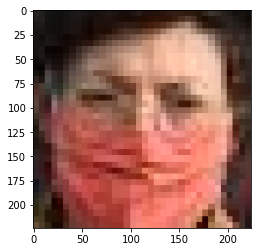

In [12]:
# load an image from file
image = load_img('Face-Mask-Dataset/Test/WithMask/1163.png', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
plt.imshow(image)
# this is label one(Ashish)

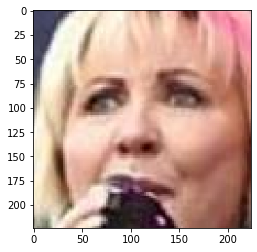

In [28]:
image = load_img('Face-Mask-Dataset/Test/WithoutMask/1000.png', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
plt.imshow(image)

In [20]:
history = model.fit(
        training_set,
        validation_data= validation_set,
        epochs=5,
        steps_per_epoch= len(training_set),
        validation_steps=len(validation_set)
        )

Epoch 1/5
313/313 [==============================] - 105s 336ms/step - loss: 0.1131 - binary_accuracy: 0.9650 - val_loss: 0.0881 - val_binary_accuracy: 0.9748
Epoch 2/5
313/313 [==============================] - 104s 332ms/step - loss: 0.1061 - binary_accuracy: 0.9658 - val_loss: 0.0834 - val_binary_accuracy: 0.9748
Epoch 3/5
313/313 [==============================] - 104s 331ms/step - loss: 0.1008 - binary_accuracy: 0.9683 - val_loss: 0.0770 - val_binary_accuracy: 0.9788
Epoch 4/5
313/313 [==============================] - 106s 337ms/step - loss: 0.0977 - binary_accuracy: 0.9690 - val_loss: 0.0774 - val_binary_accuracy: 0.9778
Epoch 5/5
313/313 [==============================] - 105s 337ms/step - loss: 0.0917 - binary_accuracy: 0.9695 - val_loss: 0.0690 - val_binary_accuracy: 0.9808


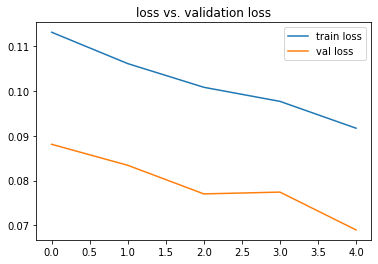

In [21]:
plt.title('loss vs. validation loss')
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

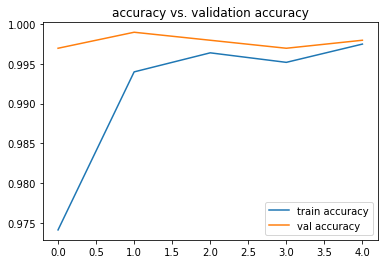

In [33]:
plt.title('accuracy vs. validation accuracy')
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

# Predict with new Image

In [22]:
def predict_image(path):
    # load an image from file
    image = load_img(path, target_size=(224, 224))
    # convert the image pixels to a numpy array
    image = img_to_array(image)
    # reshape data for the model
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    # prepare the image for the VGG model
    image = preprocess_input(image)
    # predict the probability across all output classes
    yhat = model.predict(image)
    # return np.argmax(yhat)
    return yhat

In [23]:
predict_image('Face-Mask-Dataset/Test/WithoutMask/1015.png')

array([[1.]], dtype=float32)

In [24]:
predict_image('Face-Mask-Dataset/Test/WithMask/1388.png')

array([[0.]], dtype=float32)

In [36]:
from tensorflow.keras.models import load_model
model.save('Final_Model_Face_ver02.h5')
print('Successfully saved')

Successfully saved
